In [249]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from source.acquire_m import *
from source.model_marley import *
from scipy import stats as scs
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [310]:
wrangle_obj = wrangle('Plasmodium')

In [311]:
acquire_df = wrangle_obj.acquire_data()
acquire_df

,index,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,0,[],Homo sapiens,Duffy antigen/chemokine receptor,14.000,False,CHEMBL2321626,"[{'accession': 'Q16570', 'component_descriptio...",SINGLE PROTEIN,9606
1,1,"[{'xref_id': 'P13922', 'xref_name': None, 'xre...",Plasmodium falciparum K1,Dihydrofolate reductase,6.000,False,CHEMBL1939,"[{'accession': 'P13922', 'component_descriptio...",SINGLE PROTEIN,5839
2,2,"[{'xref_id': 'Q02768', 'xref_name': None, 'xre...",Plasmodium falciparum,Cytochrome b,6.000,False,CHEMBL1777,"[{'accession': 'Q02768', 'component_descriptio...",SINGLE PROTEIN,5833
3,3,"[{'xref_id': 'P05227', 'xref_name': None, 'xre...",Plasmodium falciparum,Histidine-rich protein,6.000,False,CHEMBL1923,"[{'accession': 'P05227', 'component_descriptio...",SINGLE PROTEIN,5833
4,4,"[{'xref_id': 'Q25704', 'xref_name': None, 'xre...",Plasmodium falciparum,Dihydropteroate synthetase,6.000,False,CHEMBL2013,"[{'accession': 'Q25704', 'component_descriptio...",SINGLE PROTEIN,5833
...,...,...,...,...,...,...,...,...,...,...
107,107,[],Plasmodium falciparum (isolate 3D7),Purine nucleoside phosphorylase,6.000,False,CHEMBL4523389,"[{'accession': 'Q8I3X4', 'component_descriptio...",SINGLE PROTEIN,36329
108,108,[],Plasmodium falciparum (isolate 3D7),Plasmepsin X,6.000,False,CHEMBL4523390,"[{'accession': 'Q8IAS0', 'component_descriptio...",SINGLE PROTEIN,36329
109,109,[],Plasmodium falciparum (isolate 3D7),Casein kinase I,6.000,False,CHEMBL4523391,"[{'accession': 'Q8IHZ9', 'component_descriptio...",SINGLE PROTEIN,36329
110,110,[],Plasmodium falciparum,Glutamine amidotransferase,6.000,False,CHEMBL4523484,"[{'accession': 'Q9U775', 'component_descriptio...",SINGLE PROTEIN,5833


In [316]:
bioactivity_df = wrangle_obj.get_bioactivity_data()
bioactivity_df

List of single protein ChEMBL ID's from chosen disease:
0      CHEMBL2321626
1         CHEMBL1939
2         CHEMBL1777
3         CHEMBL1923
4         CHEMBL2013
           ...      
107    CHEMBL4523389
108    CHEMBL4523390
109    CHEMBL4523391
110    CHEMBL4523484
111    CHEMBL4630875
Name: target_chembl_id, Length: 112, dtype: object
Input a single protein target ID from the list:CHEMBL2013


AttributeError: This chemical does not contain canonical smiles to fingerprint. Please rerun the cell and choose another chemical ID.

In [306]:
wrangle_obj.disease_df

,index,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,0,[],Homo sapiens,Duffy antigen/chemokine receptor,14.000,False,CHEMBL2321626,"[{'accession': 'Q16570', 'component_descriptio...",SINGLE PROTEIN,9606
1,1,"[{'xref_id': 'P13922', 'xref_name': None, 'xre...",Plasmodium falciparum K1,Dihydrofolate reductase,6.000,False,CHEMBL1939,"[{'accession': 'P13922', 'component_descriptio...",SINGLE PROTEIN,5839
2,2,"[{'xref_id': 'Q02768', 'xref_name': None, 'xre...",Plasmodium falciparum,Cytochrome b,6.000,False,CHEMBL1777,"[{'accession': 'Q02768', 'component_descriptio...",SINGLE PROTEIN,5833
3,3,"[{'xref_id': 'P05227', 'xref_name': None, 'xre...",Plasmodium falciparum,Histidine-rich protein,6.000,False,CHEMBL1923,"[{'accession': 'P05227', 'component_descriptio...",SINGLE PROTEIN,5833
4,4,"[{'xref_id': 'Q25704', 'xref_name': None, 'xre...",Plasmodium falciparum,Dihydropteroate synthetase,6.000,False,CHEMBL2013,"[{'accession': 'Q25704', 'component_descriptio...",SINGLE PROTEIN,5833
...,...,...,...,...,...,...,...,...,...,...
107,107,[],Plasmodium falciparum (isolate 3D7),Purine nucleoside phosphorylase,6.000,False,CHEMBL4523389,"[{'accession': 'Q8I3X4', 'component_descriptio...",SINGLE PROTEIN,36329
108,108,[],Plasmodium falciparum (isolate 3D7),Plasmepsin X,6.000,False,CHEMBL4523390,"[{'accession': 'Q8IAS0', 'component_descriptio...",SINGLE PROTEIN,36329
109,109,[],Plasmodium falciparum (isolate 3D7),Casein kinase I,6.000,False,CHEMBL4523391,"[{'accession': 'Q8IHZ9', 'component_descriptio...",SINGLE PROTEIN,36329
110,110,[],Plasmodium falciparum,Glutamine amidotransferase,6.000,False,CHEMBL4523484,"[{'accession': 'Q9U775', 'component_descriptio...",SINGLE PROTEIN,5833


In [279]:
wrangle_obj.prepare_dataframe()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.000,ACTIVE,369.368,3.515,1.000,4.000,6.409
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.000,ACTIVE,226.351,3.305,0.000,5.000,6.678
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.000,ACTIVE,334.400,3.262,0.000,5.000,7.097
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,"1,580.000",INTERMEDIATE,458.375,2.233,8.000,11.000,5.801
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.000,ACTIVE,237.052,2.228,0.000,2.000,7.398
...,...,...,...,...,...,...,...,...,...
105,CHEMBL376488,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,"4,360.000",INTERMEDIATE,555.516,7.131,1.000,4.000,5.361
106,CHEMBL154580,C=CC(=O)c1ccc2ccccc2c1,"1,240.000",INTERMEDIATE,182.222,3.209,0.000,1.000,5.907
107,CHEMBL354349,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.[Cl-],"4,980.000",INTERMEDIATE,259.740,-1.014,2.000,2.000,5.303
108,CHEMBL1382627,Nc1ccc(S(=O)(=O)[N-]c2ncccn2)cc1.[Ag+],750.000,ACTIVE,357.143,1.450,1.000,5.000,6.125


In [280]:
wrangle_obj.preprocess_bioactivity_data(tests = True)

Saving 110 molecules.

Kruskal Wallis H tests for molecular descriptors (active vs. inactive)...

 MW
   H statistic = nan, p = nan
   Different distribution. Reject H0.

 LogP
   H statistic = nan, p = nan
   Different distribution. Reject H0.

 NumHDonors
   H statistic = nan, p = nan
   Different distribution. Reject H0.

 NumHAcceptors
   H statistic = nan, p = nan
   Different distribution. Reject H0.

Computing fingerprints (takes several minutes if molecules > 1000)...
Success!



In [281]:
target_id = wrangle_obj.user_target

In [282]:
bioactivity_df = pd.read_csv(f'{target_id}_bioactivity_preprocessed.csv')
bioactivity_df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.000,ACTIVE,369.368,3.515,1.000,4.000,6.409
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.000,ACTIVE,226.351,3.305,0.000,5.000,6.678
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.000,ACTIVE,334.400,3.262,0.000,5.000,7.097
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,"1,580.000",INTERMEDIATE,458.375,2.233,8.000,11.000,5.801
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.000,ACTIVE,237.052,2.228,0.000,2.000,7.398


In [283]:
bioactivity_df.shape

(110, 9)

In [284]:
fingerprint_df = pd.read_csv(f'{target_id}_pubchem_fp.csv')
fingerprint_df.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL178459,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL480,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3545157,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL4303595,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL444186,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [285]:
fingerprint_df.shape

(110, 882)

Three representations of molecule CHEMBL480:
1. SMILES notation: Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1
2. Chemical fingerprint: [1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0

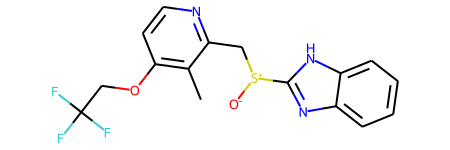

In [286]:
mol = bioactivity_df.molecule_chembl_id.values[0]
SMILES = bioactivity_df.canonical_smiles[bioactivity_df.molecule_chembl_id==mol].values[0]
fingerprint = np.array(fingerprint_df[fingerprint_df.Name==mol])[0][1:]

print(f'Three representations of molecule {mol}:')
print('1. SMILES notation:', SMILES)
print('2. Chemical fingerprint:', fingerprint)
print('3. Molecular Visualization')
Chem.MolFromSmiles(SMILES) #an example molecule

<a id='Model'></a>
## 4. Modeling the chemical fingerprints

In this part, we use machine learning to determine the charchteristics of molecules with a high chance of being viable drug candidates.

A note on modeling: $R^2$ is the percent of the variance in [potency](https://en.wikipedia.org/wiki/Potency_(pharmacology)) (as measured by $pIC_{50}$) is explained by the chemical fingerprint of the molecule.

In [287]:
# Modeling imports
from sklearn.metrics import mean_squared_error
from math import sqrt

# Regression models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [288]:
modeling_df, target = premodeling_processing(bioactivity_df, fingerprint_df)
modeling_df.head()

,molecule_id,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL178459,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,226.351,3.305,0.000,5.000
1,CHEMBL178459,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,226.351,3.305,0.000,5.000
2,CHEMBL178459,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,226.351,3.305,0.000,5.000
3,CHEMBL178459,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,226.351,3.305,0.000,5.000
4,CHEMBL480,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,369.368,3.515,1.000,4.000


In [289]:
target.bioactivity_class.value_counts()

ACTIVE          73
INTERMEDIATE    53
Name: bioactivity_class, dtype: int64

In [408]:
reg_names = ['Random Forrest Regressor', 'Tweedies Regressor']
reg_types = [RandomForestRegressor(), TweedieRegressor()]

cls_names = ['Decision Tree', 'Gaussian NB', 'Multinomial NB']
cls_types = [DecisionTreeClassifier(), GaussianNB(), MultinomialNB()]

In [409]:
model_obj = Modeling_class(modeling_df, target, reg_types, reg_names, cls_types, cls_names)

#### Regression:
Calculating baseline using dummy regressor

In [410]:
X_data = model_obj.df

In [411]:
dr = DummyRegressor(strategy='mean').fit(X_data, target.pIC50) #Baseline
yhat_baseline = target.pIC50.mean()
yhat_baseline

y_pred = [yhat_baseline for i in range(len(target.pIC50))]
rmse = sqrt(mean_squared_error(target.pIC50, y_pred))

In [412]:
#Evaluation
print(f'Baseline R^2: {round(dr.score(X_data, target.pIC50),3)}\nBaseline RMSE: {round(rmse, 3)}')

Baseline R^2: 0.0
Baseline RMSE: 0.625


Running actual regression modeling

In [413]:
avg_metrics = model_obj.regression_modeling(splits = 3)

Have not run scaling method yet, running now...
All done! Moving on to modeling, this may take a while...
Modeling done! Average scores are abstract represntations of how well this model type did, not actual scores.


In [414]:
avg_metrics

avg_score
model                    metric                                
Random Forrest Regressor neg_root_mean_squared_error      0.528
                         r2                               0.306
Tweedies Regressor       neg_root_mean_squared_error      0.567
                         r2                               0.191

### Evaluation Visualizations:

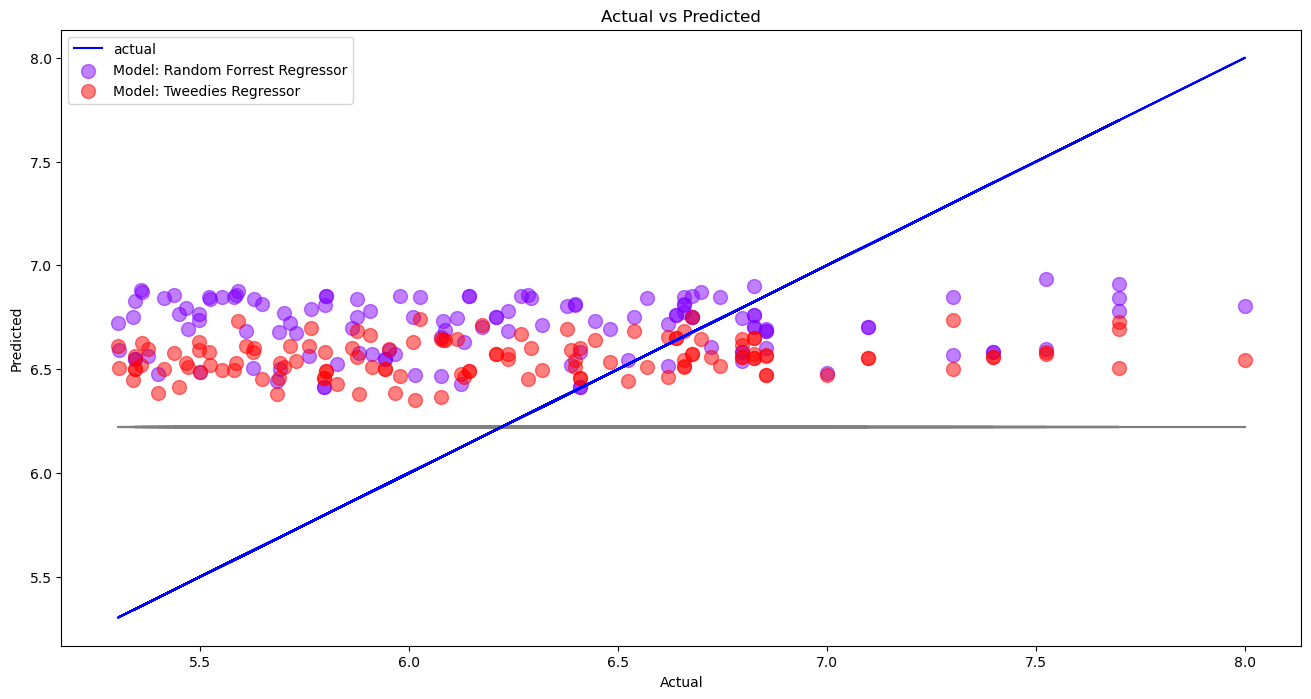

In [415]:
# This is broken, just like my brain after trying to make it work for an hour
# Just kidding, never use linear regression or it will break EVERYTHING
model_obj.plot_actual_vs_pred()

#### Classification:
Calculating baseline using most common mean.

In [297]:
# Mode in bioactivity class
print(f'Most common class label: {target.bioactivity_class.value_counts().index[0]}\nEncoded label as: {target.encoded_bac.value_counts().index[0]}')

Most common class label: ACTIVE
Encoded label as: 0


In [298]:
dc = DummyClassifier(strategy='most_frequent').fit(X_data, target.encoded_bac) #Baseline
#Evaluation
print(f'Baseline Accuracy: {round(dc.score(X_data, target.encoded_bac),3) * 100}%')

Baseline Accuracy: 57.9%


In [299]:
model_obj.classification_modeling()

Scaling has already been run. Moving on to modeling, this may take a while...


,model,average_accuracy%
0,Decision Tree,66.970
2,Multinomial NB,62.770
1,Gaussian NB,58.500
